In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("store_sales (1).csv")
df.head()

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
0,1,58,Female,Accessories,Handbag,115.50,Autumn,Card,3.5,18,4
1,2,40,Male,Mens Clothing,Shirt,103.43,Spring,Card,4.1,13,4
2,3,66,Female,Sports,Football,35.45,Spring,Card,3.3,11,3
3,4,39,Female,Accessories,Handbag,153.31,Spring,Card,4.4,13,4
4,5,23,Female,Home,Curtains,151.43,Winter,Card,4.1,20,10


In [3]:
print(df.isna())

      CustomerID    Age  Gender  Category  ItemPurchased  Amount  Season  \
0          False  False   False     False          False   False   False   
1          False  False   False     False          False   False   False   
2          False  False   False     False          False   False   False   
3          False  False   False     False          False   False   False   
4          False  False   False     False          False   False   False   
...          ...    ...     ...       ...            ...     ...     ...   
4995       False  False   False     False          False   False   False   
4996       False  False   False     False          False   False   False   
4997       False  False   False     False          False   False   False   
4998       False  False   False     False          False   False   False   
4999       False  False   False     False          False   False   False   

      PaymentMethod  ItemRating  DiscountApplied(%)  PreviousPurchases  
0             

In [4]:
print(df.isna().sum())

CustomerID            0
Age                   0
Gender                0
Category              0
ItemPurchased         0
Amount                0
Season                0
PaymentMethod         0
ItemRating            0
DiscountApplied(%)    0
PreviousPurchases     0
dtype: int64


In [5]:
df.duplicated()[df.duplicated()==True]

,0


In [6]:
print("Shape (rows, columns): ", df.shape)
print("number of rows: ", df.shape[0])

Shape (rows, columns):  (5000, 11)
number of rows:  5000


In [7]:
df.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Category,object
ItemPurchased,object
Amount,float64
Season,object
PaymentMethod,object
ItemRating,float64
DiscountApplied(%),int64


In [8]:
df.describe(include='all')

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
count,5000.000000,5000.000000,5000,5000,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000
unique,NaN,NaN,2,9,30,NaN,4,2,NaN,NaN,NaN
top,NaN,NaN,Female,Footwear,Sandals,NaN,Spring,Card,NaN,NaN,NaN
freq,NaN,NaN,2504,983,339,NaN,1300,4009,NaN,NaN,NaN
mean,2500.500000,45.224800,NaN,NaN,NaN,285.090522,NaN,NaN,3.784160,14.983600,5.008800
std,1443.520003,14.564995,NaN,NaN,NaN,551.454382,NaN,NaN,0.681796,5.988063,2.194285
min,1.000000,20.000000,NaN,NaN,NaN,5.080000,NaN,NaN,1.100000,0.000000,0.000000
25%,1250.750000,33.000000,NaN,NaN,NaN,70.547500,NaN,NaN,3.300000,11.000000,3.000000
50%,2500.500000,45.000000,NaN,NaN,NaN,122.485000,NaN,NaN,3.800000,15.000000,5.000000
75%,3750.250000,58.000000,NaN,NaN,NaN,184.535000,NaN,NaN,4.300000,19.000000,6.000000


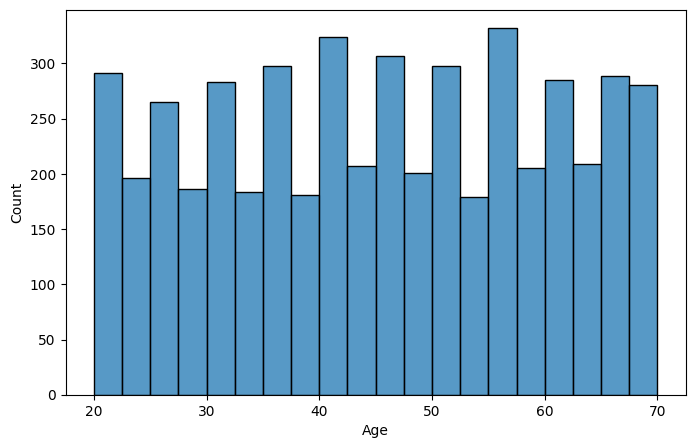

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20)
plt.show()

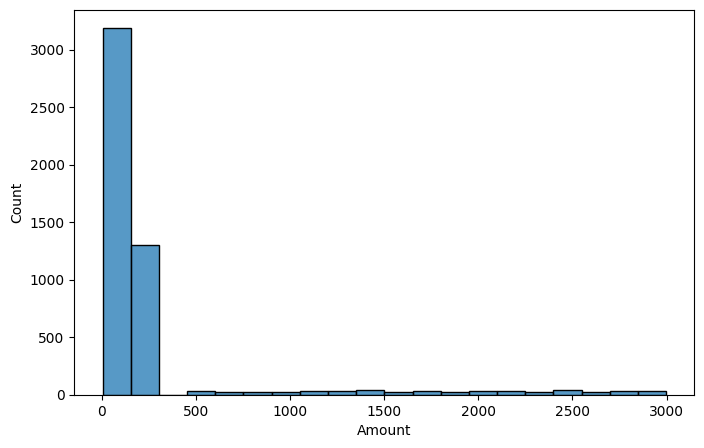

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=20)
plt.show()

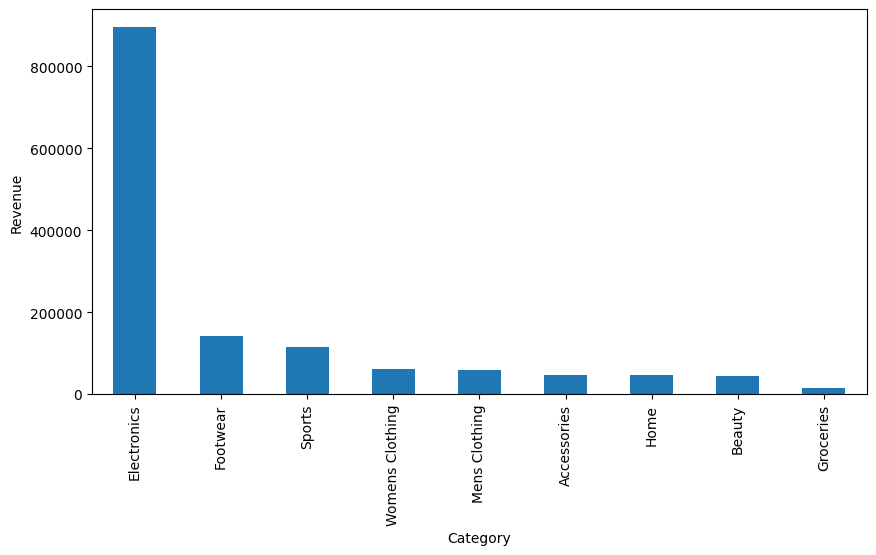

In [11]:
category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
category_revenue.plot(kind='bar')
plt.ylabel("Revenue")
plt.show()

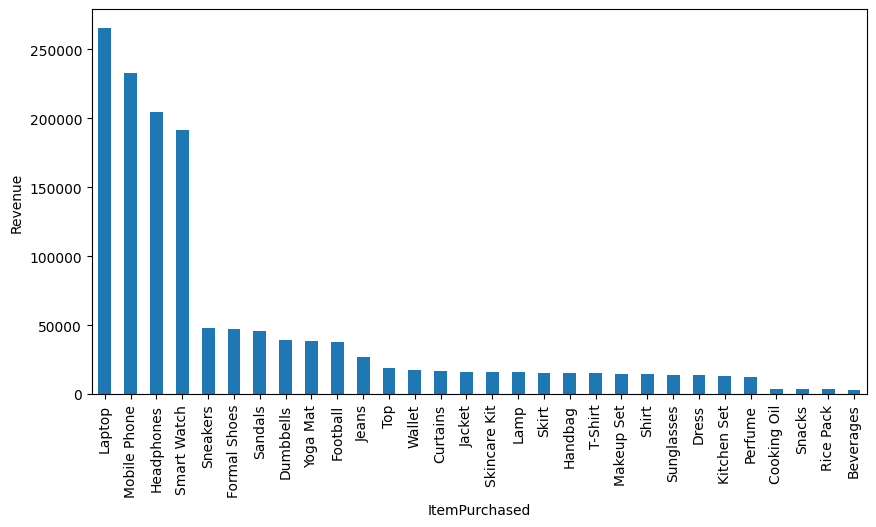

In [12]:
item_revenue = df.groupby('ItemPurchased')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
item_revenue.plot(kind='bar')
plt.ylabel("Revenue")
plt.show()

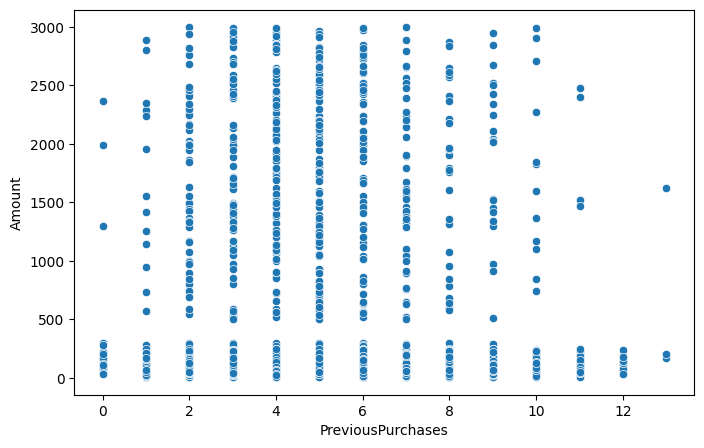

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PreviousPurchases', y='Amount', data=df)
plt.show()

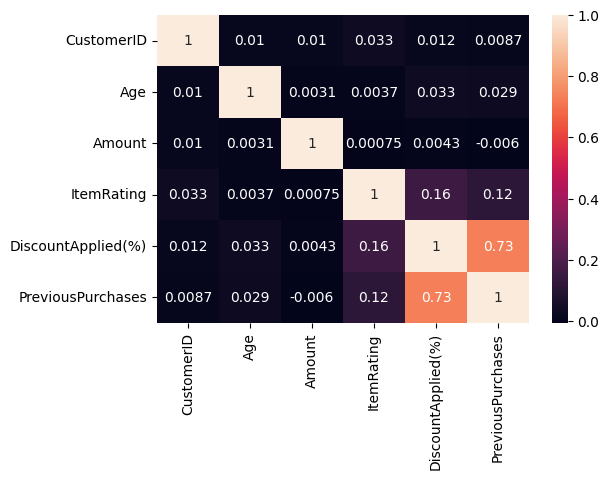

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

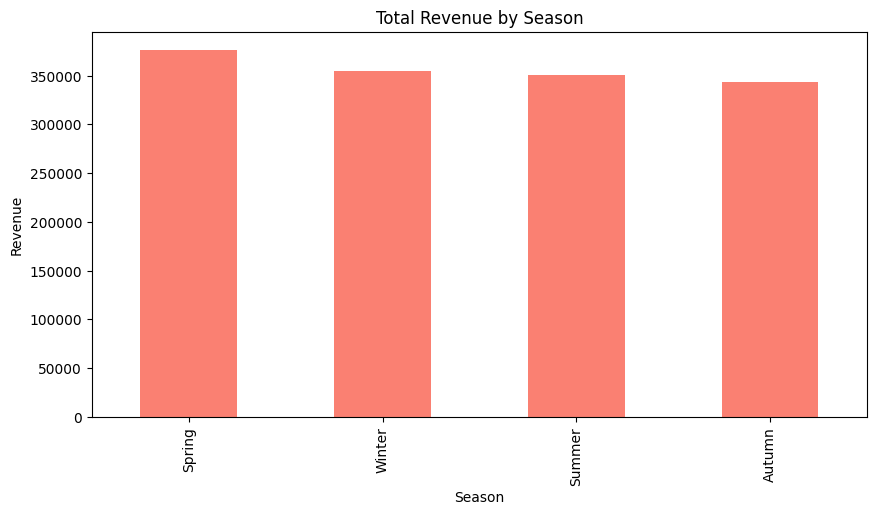

In [15]:

plt.figure(figsize=(10,5))
df.groupby('Season')['Amount'].sum().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Total Revenue by Season")
plt.ylabel("Revenue")
plt.show()

/tmp/ipython-input-2751445302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=df, palette='viridis')


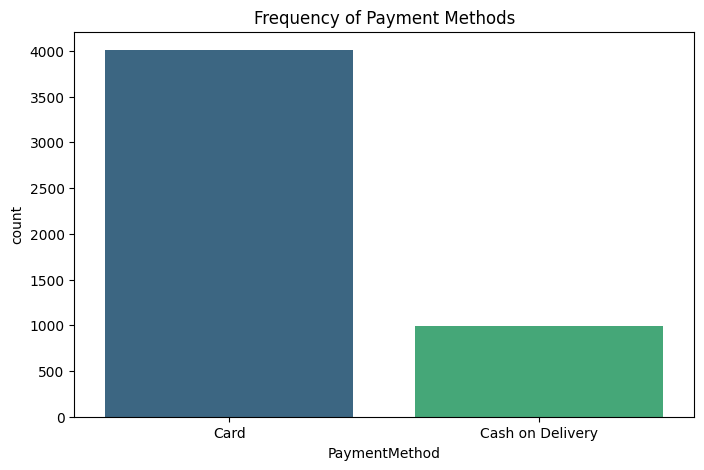

In [16]:

plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', data=df, palette='viridis')
plt.title("Frequency of Payment Methods")
plt.show()

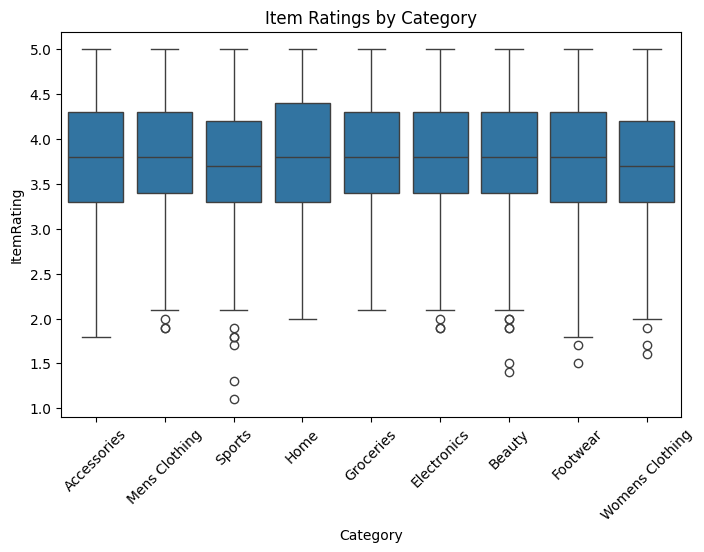

In [17]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='ItemRating', data=df)
plt.xticks(rotation=45)
plt.title("Item Ratings by Category")
plt.show()